## **Project Title: Twitter Sentiment Analysis**












**Project Description:**
Sentiment analysis is frequently used to analyze customer
feedback, survey responses, and product reviews. In this
project we Identifies either sentiment of tweet is positive or Negative using
NLP. Here I compared 3 models namely RNN, LSTM and GRU.
On the bases of accuracy we will decide which model is going
to predict the sentiment of tweet.

**Data Source:**
"https://www.kaggle.com/code/vignesh1694/eda-twitter-sentiments/input?select=train.csv"

In [ ]:
# import necessary libraries
import numpy as np                                                                     # manipulate mathematical calculations
import pandas as pd                                                                    # manipulate dataframes
import matplotlib.pyplot as plt                                                        # data visualization
import seaborn as sns                                                                  # data visulization

from sklearn.model_selection import train_test_split                                   # To spilt data into training and testing
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score     # To see accuracy, f1 score, precision, recall
from wordcloud import WordCloud                                                        # to see the most frequent words in a body of text

import nltk                                                                            # this is text preprocessing library
nltk.download("stopwords")
from nltk.corpus import stopwords                                                      # used to remove stopwords
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer                                                # used for lemmatization

from tensorflow.keras.preprocessing.text import Tokenizer                              # divide string into tokens
from tensorflow.keras.preprocessing import sequence                                    # for padding
from tensorflow.keras.models import Sequential                                         # Sequential consists of a sequence of layers, one after the other
from tensorflow.keras.layers import Dense,Embedding,Dropout, SimpleRNN, LSTM, GRU      # required layers




In [2]:
#to fetch file from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading file
df= pd.read_csv("/content/drive/MyDrive/NLP/sukhmal das sir /datasets/twitter.csv")
df.head() # this will give first 5 rows of dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Number of rows and columns
df.shape

(31962, 3)

* There are 31962 rows and 3 columns in given dataframe

In [5]:
# Basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


* Datatype of 'id' and 'label' is in numeric format and for 'tweet' it is in string format
* there is no null value in the dataset

In [6]:
# Drop unnecessary column
df.drop("id", inplace=True, axis=1)

In [7]:
#To see duplicate values
df.duplicated().sum()

2432

* There are 2432 duplicate values in the dataframe, we have to remove this as below,

In [8]:
# drop duplicated values
df.drop_duplicates(inplace=True)
df.shape

(29530, 2)

* Now our rows are reduced to 29530 after deleting duplicate values.

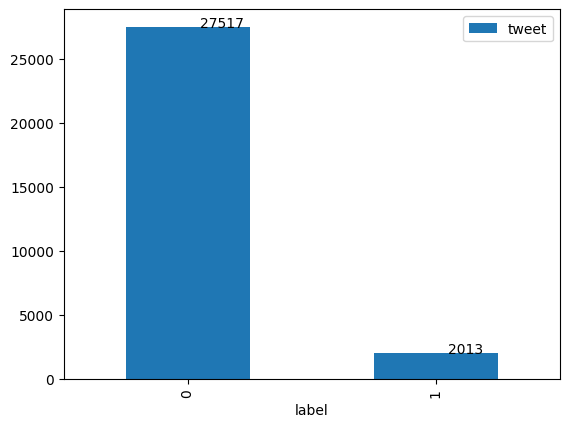

In [9]:
# The distribution of labels
ax= df.groupby('label').count().plot(kind='bar') # count of labels

for p in ax.patches:
  plt.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()+1)) # to display number of counts of labels in graph.

plt.show()

* Out of 29530 records 27517 are 0 means negative tweets, and 2013 are 1 means positive tweets. So we can say that our dataset have most of the negative tweets.

<function matplotlib.pyplot.show(close=None, block=None)>

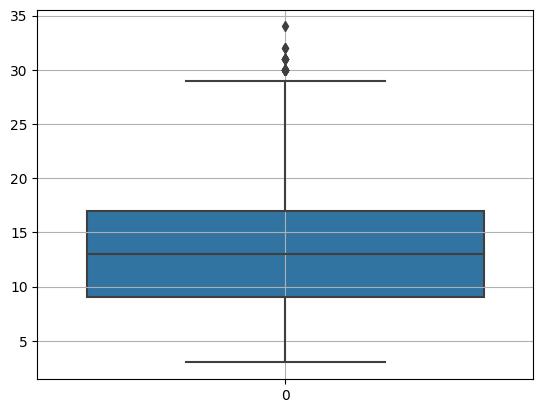

In [15]:
# The distribution of tweet text lengths

tweet_len = pd.Series([len(tweet.split()) for tweet in df["tweet"]]) #length of each tweet
sns.boxplot(tweet_len)
plt.grid(True)
plt.show

* we can say that maximum tweets having length is in between 9 to 17

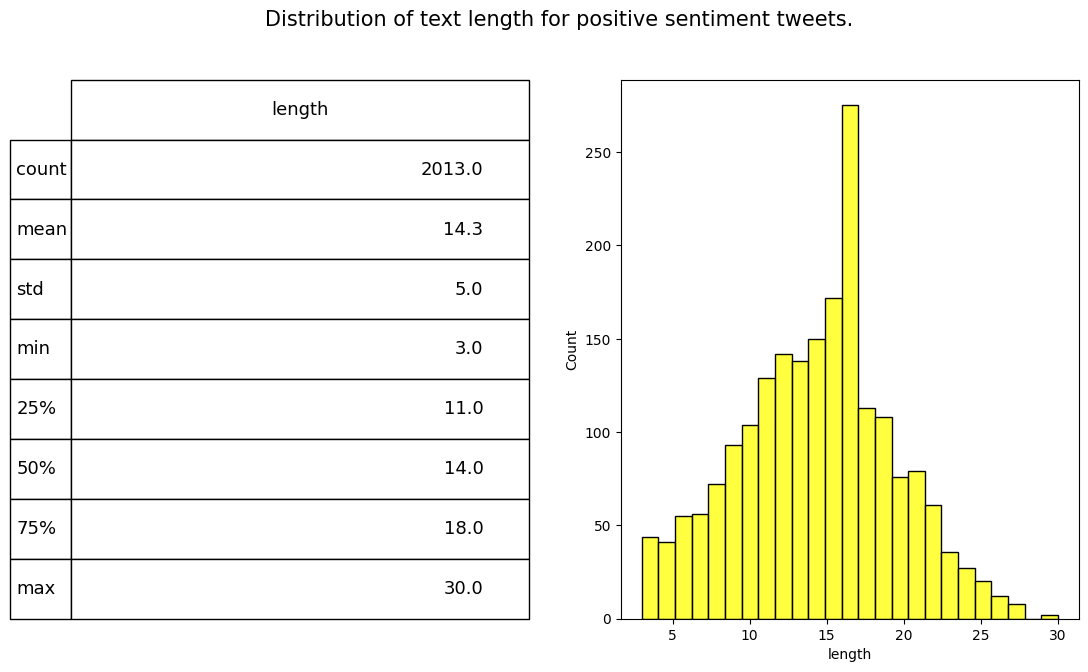

In [ ]:
#Plotting the distribution of text length for positive sentiment tweets
fig = plt.figure(figsize=(13,7))
df['length'] = df.tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['label']==1]['length'], ax=ax1,color='yellow')
describe = df.length[df.label==1].describe().to_frame().round(1)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 13
box = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=box, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=15)

plt.show()

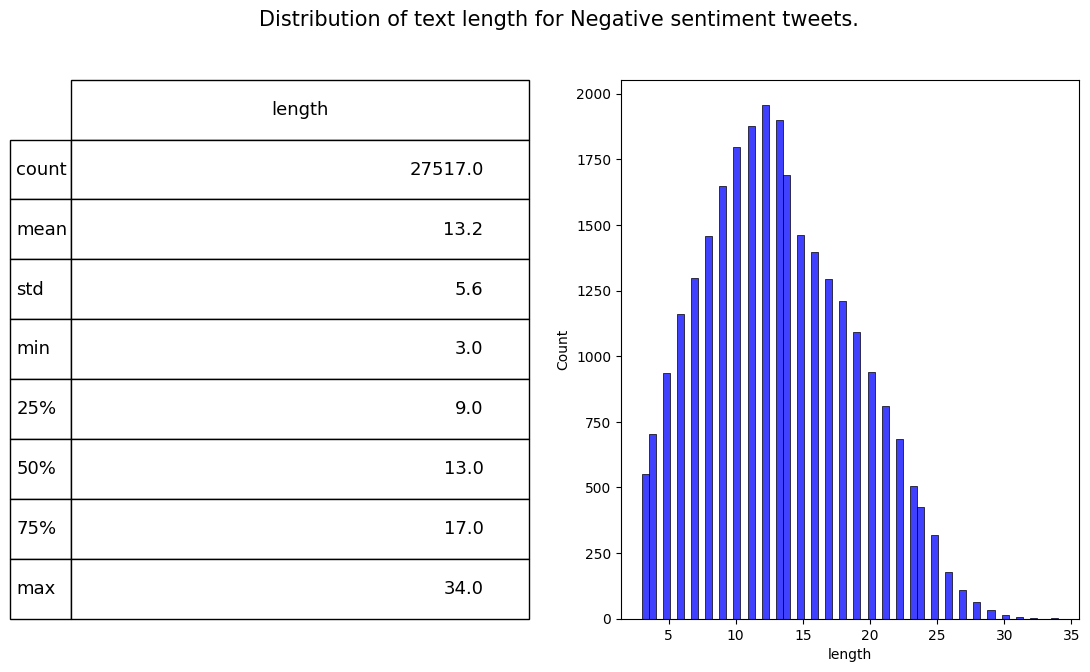

In [ ]:
#Plotting the distribution of text length for nagative sentiment tweets
fig = plt.figure(figsize=(13,7))
df['length'] = df.tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['label']==0]['length'], ax=ax1,color='blue')
describe = df.length[df.label==0].describe().to_frame().round(1)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 13
box = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=box, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=15)

plt.show()

In [ ]:
# first 5 records
df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,18
1,0,@user @user thanks for #lyft credit i can't us...,19
2,0,bihday your majesty,3
3,0,#model i love u take with u all the time in ...,14
4,0,factsguide: society now #motivation,4


In [ ]:
# as length is temporary column for analysis, we have to drop that column
df.drop("length", inplace=True, axis=1)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Most frequent words in Positive tweets


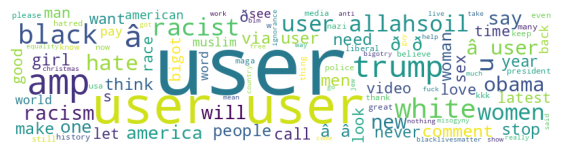

Most frequent words in negative tweets


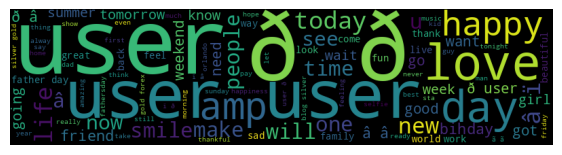

In [ ]:
# To see frequent words in positive and negative tweets
negative=" ".join(df[df["label"]==0]["tweet"])
positive=" ".join(df[df["label"]==1]["tweet"])

print("Most frequent words in Positive tweets")
wc= WordCloud(width=800, background_color="white",min_font_size=10)
wc.generate(positive)
plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

print("Most frequent words in negative tweets")
wc= WordCloud(width=800, background_color="black",min_font_size=10)
wc.generate(negative)
plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
def preprocess_text(text):
  # convert text to lower case and perform tokenization
  tokens= text.lower()
  # remove all symbols using re module
  import re
  clean_tokens = re.sub(r'[^a-zA-Z0-9]',' ',tokens)
  # split into tokens
  clean_tokens= clean_tokens.split()
  # remove stopwords
  clean_tokens = [w for w in clean_tokens if w not in stopwords.words("english")]
  #lemmatization
  lemmatizer= WordNetLemmatizer()
  clean_tokens=[lemmatizer.lemmatize(token) for token in clean_tokens]
  return " ".join(clean_tokens)

print("\nOriginal tweet ->", df['tweet'][0])
print("\nProcessed tweet ->", preprocess_text(df['tweet'][0]))


Original tweet ->  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run

Processed tweet -> user father dysfunctional selfish drag kid dysfunction run


* from this function we get to know that our data is cleaned properly. Unwanted symbols, stopwords all are removed.

In [ ]:
#apply the function to our dataframe
x = list(map(preprocess_text, df['tweet']))


In [ ]:
#assign labelled values to y
y=df["label"]

In [ ]:
# Divide x,y in training and testing data
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.3, random_state=1, stratify =y)

In [ ]:
# Tokenization
tokenizer= Tokenizer()
tokenizer.fit_on_texts(xtrain)

In [ ]:
vocabulary= tokenizer.index_word
vocab_len= len(vocabulary)
print(vocab_len)
print(vocabulary)

29122
{1: 'user', 2: 'day', 3: 'love', 4: 'amp', 5: 'happy', 6: 'life', 7: 'today', 8: 'like', 9: 'u', 10: 'new', 11: 'get', 12: 'father', 13: 'time', 14: 'bihday', 15: 'people', 16: 'smile', 17: 'one', 18: 'make', 19: 'see', 20: 'good', 21: 'go', 22: 'friend', 23: 'girl', 24: 'weekend', 25: 'fun', 26: 'family', 27: 'want', 28: '2', 29: 'week', 30: 'summer', 31: 'friday', 32: 'work', 33: 'year', 34: 'positive', 35: 'need', 36: 'thankful', 37: 'great', 38: 'going', 39: 'got', 40: 'back', 41: 'know', 42: 'wait', 43: 'dad', 44: 'world', 45: 'beautiful', 46: 'really', 47: 'morning', 48: 'best', 49: 'tomorrow', 50: 'way', 51: 'look', 52: 'thing', 53: 'first', 54: 'orlando', 55: 'come', 56: '3', 57: 'think', 58: 'sad', 59: 'never', 60: 'fathersday', 61: 'home', 62: 'night', 63: 'music', 64: 'feel', 65: 'trump', 66: 'right', 67: 'blog', 68: 'much', 69: 'cute', 70: '1', 71: 'sunday', 72: 'say', 73: 'next', 74: 'happiness', 75: 'always', 76: 'live', 77: 'even', 78: 'feeling', 79: 'still', 80: '

* vocabulary gives unique tokens , there are 29122 unique tokens in the dataset.

In [ ]:
train_sequence= tokenizer.texts_to_sequences(xtrain)
print(train_sequence)
print(len(train_sequence))

[[34, 146, 10782], [2, 2, 45, 2, 768, 183, 1908, 349], [5, 77, 137, 298, 150, 16, 459, 32], [3728, 10783, 3729, 7016, 1002, 5356, 30, 288, 305, 10784], [4371, 5357, 10785, 1610, 251, 1040, 113, 1, 428], [8, 769, 4372, 10786, 5358, 3730], [1, 7, 11, 2391, 7017, 1, 513, 10787], [1, 1, 1, 12, 2, 5359, 93, 646, 3], [501, 2878, 2392, 12, 2, 418, 419, 702, 11, 360, 148, 61, 25], [1, 100, 344, 635, 770, 117, 2879, 86, 1189, 149, 10788], [10789, 2584, 93], [636, 4373, 238, 613, 54, 2038, 221, 1, 1, 1], [11, 19, 329, 7, 10790, 10791], [244, 2393, 771, 9, 1190, 894, 1528, 1], [39, 1610, 47, 192, 80, 2, 3731, 816, 1384, 5], [1, 460, 1, 10792, 80, 5360, 920, 4, 3732, 46, 37, 193, 1149, 10793], [1, 10794, 1385, 1386, 252, 1611, 603, 103, 3243, 686, 1909, 1191, 275, 19, 51, 1263], [772, 404, 267, 5, 133, 2], [10, 176, 1041, 68, 176, 10795, 10796, 10797, 1803, 2394, 3], [405, 1042, 174, 1691, 4374, 2395, 5361, 47, 10798], [1, 407, 3733, 420, 97, 1, 1, 1, 65], [2039, 2040, 2041, 2042, 2043, 953, 647, 

In [ ]:
doc_length=[]
for i in train_sequence:
  doc_length.append(len(i))
print(doc_length) # this will give each document length
print(max(doc_length)) # maximum length of deocuments , we used this in padding

[3, 8, 8, 10, 9, 6, 8, 9, 13, 11, 3, 10, 6, 8, 10, 14, 16, 6, 11, 9, 9, 15, 10, 14, 13, 10, 10, 3, 10, 5, 4, 5, 2, 8, 10, 13, 9, 3, 8, 10, 6, 7, 13, 7, 10, 4, 13, 4, 11, 11, 7, 7, 1, 5, 8, 9, 7, 13, 15, 10, 10, 5, 4, 2, 14, 14, 5, 9, 8, 6, 14, 8, 10, 13, 12, 10, 9, 10, 13, 14, 6, 8, 14, 10, 12, 10, 2, 8, 9, 13, 10, 15, 12, 6, 10, 5, 10, 11, 11, 12, 7, 8, 13, 8, 6, 4, 11, 8, 3, 14, 8, 11, 9, 6, 3, 10, 13, 3, 16, 6, 10, 8, 13, 8, 7, 7, 14, 16, 9, 16, 4, 7, 2, 5, 6, 10, 7, 9, 8, 13, 8, 6, 10, 7, 9, 9, 7, 11, 11, 12, 9, 15, 9, 5, 9, 5, 12, 10, 9, 11, 7, 4, 13, 11, 9, 10, 5, 11, 8, 3, 9, 12, 8, 11, 8, 13, 8, 8, 10, 5, 13, 7, 12, 7, 8, 10, 4, 12, 10, 12, 6, 14, 8, 11, 4, 13, 10, 5, 8, 7, 16, 8, 7, 13, 5, 10, 11, 11, 18, 10, 4, 11, 3, 13, 7, 3, 7, 11, 9, 4, 7, 10, 10, 10, 9, 12, 11, 13, 9, 11, 6, 12, 12, 2, 4, 12, 13, 2, 12, 5, 10, 10, 7, 12, 3, 11, 13, 5, 11, 13, 11, 5, 9, 11, 6, 11, 9, 13, 9, 12, 12, 10, 5, 11, 6, 4, 5, 12, 9, 10, 11, 7, 5, 9, 13, 9, 12, 9, 13, 4, 9, 11, 4, 8, 12, 4, 14, 6,

In [ ]:
print(np.quantile(doc_length, 0.5))
print(np.quantile(doc_length, 0.9))
print(np.quantile(doc_length, 0.95))
print(np.quantile(doc_length, 0.99))

9.0
13.0
14.0
16.0


* Here we find percentage of length of documents. 50% of documents having length 9, 90% of documents having length is 13, likewise 95% and 99% of documents having length 14 and 16 respectively. So for padding we choose 16 length as maximun length

In [ ]:
max_length=16

In [ ]:
# pre-padding of training data
train_matrix= sequence.pad_sequences(train_sequence, maxlen= max_length)
train_matrix

array([[    0,     0,     0, ...,    34,   146, 10782],
       [    0,     0,     0, ...,   183,  1908,   349],
       [    0,     0,     0, ...,    16,   459,    32],
       ...,
       [    0,     0,     0, ...,   607, 29119, 29120],
       [    0,     0,     0, ...,    95,  1205, 29121],
       [    0,     0,     0, ...,  1714,   104,  6433]], dtype=int32)

In [ ]:
# pre-padding of testing data
test_sequence= tokenizer.texts_to_sequences(xtest)
test_matrix= sequence.pad_sequences(test_sequence, maxlen= max_length)
test_matrix

array([[    0,     0,     0, ...,    52,   379,     1],
       [    0,     0,     0, ...,    72,   284,   204],
       [    0,     0,     0, ...,   289, 18527,  9368],
       ...,
       [    0,     0,     0, ...,   199,    26,   163],
       [    0,     0,     0, ...,   303,   178,    22],
       [    0,     0,     0, ...,   350,    13,  1079]], dtype=int32)

* Text preprocessing is done now we will build the model.
- we will compare the results for three models namely, RNN(Recurrent Neural Network), LSTM(Long Short-Term Memory), GRU(Gated Recurrent Unit) and then decide which model is best for predictions.


RNN

In [ ]:
model= Sequential()
model.add(Embedding(input_dim= vocab_len+1,     # here we add 1 in vocabulary length as we do padding and in that we add one token of number 0.
          output_dim=100,                       #output_dim= hyperparameter, means each token or vector is of length 100
          input_length= max_length,             #input_length=length of each document
          mask_zero=True))                      #mask_zero= True, means we use zero for only padding, so do not learn any value for the zero token.
model.add(SimpleRNN(64))                        # in single unit there are 64 neuros
model.add(Dense(16, activation="tanh"))         # input layer having 16 neurons
model.add(Dense(8, activation="tanh"))          # 1st hidden layer
model.add(Dense(8, activation="tanh"))          # 2nd hidden layer
model.add(Dense(1, activation= "sigmoid"))      # output laer # here classification is binary so used sigmoid as activation function

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_matrix, ytrain, epochs=10, batch_size=32)

Epoch 1/10
646/646 [==============================] - 24s 33ms/step - loss: 0.2594
Epoch 2/10
646/646 [==============================] - 21s 33ms/step - loss: 0.2446
Epoch 3/10
646/646 [==============================] - 23s 35ms/step - loss: 0.1117
Epoch 4/10
646/646 [==============================] - 24s 36ms/step - loss: 0.0254
Epoch 5/10
646/646 [==============================] - 21s 32ms/step - loss: 0.0100
Epoch 6/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0055
Epoch 7/10
646/646 [==============================] - 23s 35ms/step - loss: 0.0068
Epoch 8/10
646/646 [==============================] - 21s 32ms/step - loss: 0.0053
Epoch 9/10
646/646 [==============================] - 21s 33ms/step - loss: 0.0051
Epoch 10/10
646/646 [==============================] - 20s 31ms/step - loss: 0.0030


* optimizer- Training the network
- Loss Function – A cost function is used to calculate the cost, which is the difference between the predicted value and the actual value.
- Epoch – The number of times the algorithm runs on the whole training dataset.
- Batch – It denotes the number of samples to be taken to for updating the model parameters.

In [ ]:
# prediction and accuracy
ypred= model.predict(test_matrix)
ypred= np.where(ypred>=0.5,1,0)
print(ypred)
print(classification_report(ytest, ypred))

277/277 [==============================] - 1s 3ms/step
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8255
           1       0.69      0.55      0.61       604

    accuracy                           0.95      8859
   macro avg       0.83      0.77      0.79      8859
weighted avg       0.95      0.95      0.95      8859



* From the precision score, the 'Negative Tweet' has 97% ability to identify correct Negative tweet between all predicted tweets. Also,'Positive tweet' have ability of 69%. From the recall score, the Negative tweet has a 98% ability to identify correct negative tweet between all actual tweets and positive tweets have ability of 55%. From the f1-score, the negative tweet has 97% ability to identify correct negative tweet between all tweets and positive tweets have abilities of 61%. Accuracy score can choose for measuring the ability of the model. It's 95% ability to classify correctly.

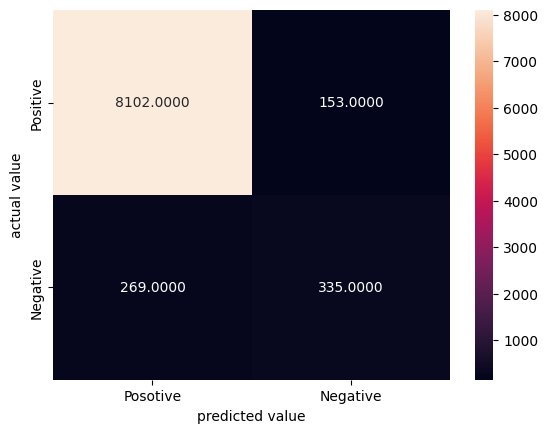

In [ ]:
# Determining confusion matrix
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='0.4f',xticklabels=['Posotive','Negative'],yticklabels=['Positive','Negative'])
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

* Among 8859 tweets, correct predicted tweets are 8102+335= 8437
- 153 are the tweets which are actually positive but predicted negative, likewise 269 tweets are actually negative but predicted positive.

LSTM

In [ ]:
model1= Sequential()
model1.add(Embedding(input_dim= vocab_len+1,
            output_dim=100,
            input_length= max_length,
            mask_zero= True))
model1.add(LSTM(64))
model1.add(Dense(32, activation="tanh"))
model1.add(Dense(16, activation="tanh"))
model1.add(Dense(1, activation="sigmoid"))

model1.compile(optimizer="adam", loss="binary_crossentropy")
model1.fit(train_matrix, ytrain, epochs=10, batch_size=32)

Epoch 1/10
646/646 [==============================] - 31s 40ms/step - loss: 0.1893
Epoch 2/10
646/646 [==============================] - 26s 40ms/step - loss: 0.0646
Epoch 3/10
646/646 [==============================] - 26s 41ms/step - loss: 0.0259
Epoch 4/10
646/646 [==============================] - 28s 43ms/step - loss: 0.0137
Epoch 5/10
646/646 [==============================] - 25s 39ms/step - loss: 0.0078
Epoch 6/10
646/646 [==============================] - 26s 40ms/step - loss: 0.0054
Epoch 7/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0026
Epoch 8/10
646/646 [==============================] - 24s 37ms/step - loss: 0.0036
Epoch 9/10
646/646 [==============================] - 25s 38ms/step - loss: 0.0033
Epoch 10/10
646/646 [==============================] - 25s 38ms/step - loss: 0.0020


In [ ]:
ypred1=model1.predict(test_matrix)
ypred1= np.where(ypred1>=0.5, 1,0)
print(classification_report(ytest, ypred1))

277/277 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8255
           1       0.67      0.59      0.63       604

    accuracy                           0.95      8859
   macro avg       0.82      0.79      0.80      8859
weighted avg       0.95      0.95      0.95      8859



* Using LSTM we get slightly better result than RNN

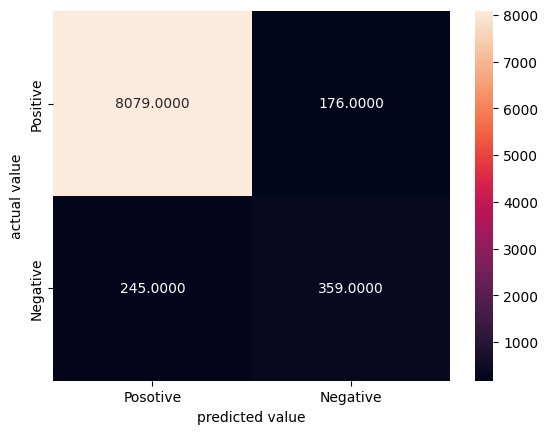

In [ ]:
# Determining confusion matrix
sns.heatmap(confusion_matrix(ytest,ypred1),annot=True,fmt='0.4f',xticklabels=['Posotive','Negative'],yticklabels=['Positive','Negative'])
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

* Among 8859 tweets, correct predicted tweets are 8079+359= 8438
- 176 are the tweets which are actually positive but predicted negative, likewise 245 tweets are actually negative but predicted positive.

GRU

In [ ]:
model3= Sequential()
model3.add(Embedding(input_dim= vocab_len+1,
            output_dim=100,
            input_length= max_length,
            mask_zero= True))
model3.add(GRU(64))
model3.add(Dense(32, activation="tanh"))
model3.add(Dense(16, activation="tanh"))
model3.add(Dense(1, activation="sigmoid"))

model3.compile(optimizer="adam", loss="binary_crossentropy")
model3.fit(train_matrix, ytrain, epochs=10, batch_size=32)

Epoch 1/10
646/646 [==============================] - 28s 37ms/step - loss: 0.1740
Epoch 2/10
646/646 [==============================] - 23s 35ms/step - loss: 0.0526
Epoch 3/10
646/646 [==============================] - 24s 36ms/step - loss: 0.0185
Epoch 4/10
646/646 [==============================] - 24s 38ms/step - loss: 0.0094
Epoch 5/10
646/646 [==============================] - 22s 34ms/step - loss: 0.0074
Epoch 6/10
646/646 [==============================] - 24s 37ms/step - loss: 0.0045
Epoch 7/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0031
Epoch 8/10
646/646 [==============================] - 22s 35ms/step - loss: 0.0020
Epoch 9/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0025
Epoch 10/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0021


In [ ]:
ypred3=model3.predict(test_matrix)
ypred3= np.where(ypred3>=0.5, 1,0)
print(classification_report(ytest, ypred3))

277/277 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8255
           1       0.71      0.54      0.62       604

    accuracy                           0.95      8859
   macro avg       0.84      0.76      0.80      8859
weighted avg       0.95      0.95      0.95      8859



* LSTM and GRU results are almost same to find better insights check for confusion matrix

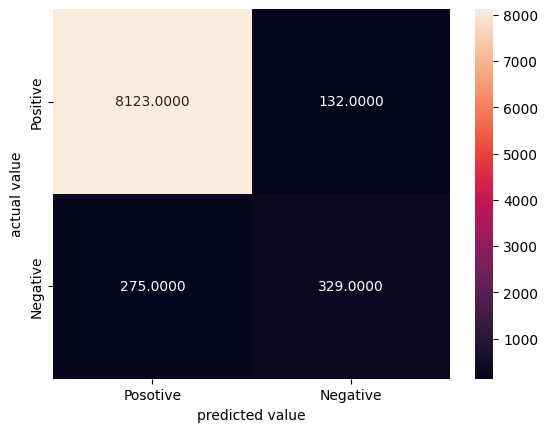

In [ ]:
# Determining confusion matrix
sns.heatmap(confusion_matrix(ytest,ypred3),annot=True,fmt='0.4f',xticklabels=['Posotive','Negative'],yticklabels=['Positive','Negative'])
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

* Among 8859 tweets, correct predicted tweets are 8123+329= 8452
- 132 are the tweets which are actually positive but predicted negative, likewise 275 tweets are actually negative but predicted positive.

## Conclusion:
From above discussion we conclude that GRU is the best model with accuracy 95%. We use this model for real time examples.

In [ ]:
tweet1= "7 horribly ads from #2016 that made us cry"
tweet2="i'm sad. my aunt passed away. she was 96.   #funeral"
tweet3="I enjoyed the movie"


In [ ]:
def preprocess_text(tweets):
  # convert text to lower case and perform tokenization
  tokens= tweets.lower()
  # remove all symbols using re module
  import re
  clean_tokens = re.sub(r'[^a-zA-Z0-9]',' ',tokens)
  # split into tokens
  clean_tokens= clean_tokens.split()
  # remove stopwords
  clean_tokens = [w for w in clean_tokens if w not in stopwords.words("english")]
  #lemmatization
  lemmatizer= WordNetLemmatizer()
  clean_tokens=[lemmatizer.lemmatize(token) for token in clean_tokens]
  return " ".join(clean_tokens)

x=list(map(preprocess_text, tweet3))

def predict_sentiment(tweets):
  global x
  seq= tokenizer.texts_to_sequences(x)
  matrix= sequence.pad_sequences(seq, maxlen=max_length)
  probability= model3.predict(matrix)
  sentiment= np.where(probability>=0.5,"positive","negative")[0][0]
  return sentiment

In [ ]:
predict_sentiment(tweet1)

1/1 [==============================] - 0s 20ms/step


'negative'

* Our model predict the result correctly for negative tweets

In [ ]:
predict_sentiment(tweet2)

1/1 [==============================] - 0s 21ms/step


'negative'

* Here is also model predict result correctly

In [ ]:
predict_sentiment(tweet3)

1/1 [==============================] - 0s 20ms/step


'negative'

* It seems tweet3 is positive sentiment, but predicted negative. This is due to our precision, recall and f-1 score for given model is less for positive tweets.


